<h1 style="color:blue;">  <B> Tweets Clustering</B>  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$<B> BY INES REBHI</B>
 </h1>



<img src="images/giphy.gif" width="400" height="400" align="center"/>'



<h3 style="color:blue;"> <B>Introduction</B>
 </B> </h3>

<B>Data redundancy is an important problem of Twitter. Twitter users are likely to generate similar tweets (e.g., using the Retweet function) about some popular topics/events.
a result of a huge number of tweets which let  tweetos not interested to loss time about reading for the same topic many tweets     
  So by clustering similar tweets together, we can generate a more concise and organized representation of the raw tweets, which will be very useful for busy Tweetos to read only one tweet per class  </B> </br>

<B> Aim of our Project is to  </B>
<li> <B>1/ gathering real time tweets  using a twitter API </B></li>
<li><B> 2/ Preprocessing tweets </B> </li>
<li><B> 3/Apply a NLP to text tweets</B> </li>
<li><B> 4/ Modeling By using K-means as a ML algorithm of clustering </B></li>

<h3 style="color:blue;"> <B>Keywords </B></h3>

<B>Text mining  $~~~/~~~~$clustering$~~~/~~~~$NLP $~~~/~~~~$tweepy$~~~/~~~~$ NLTK$~~~/~~~~$ twitter API </B>

<h3 style="color:blue;"> <B>STEP1: Getting API keys from Twitter</B>
 </B> </h3>

<B>An API is standing for Application Programming Interfaces (APIs) and they allow you to access resources only available on the server</B></br>
<B>Now The Twitter API lets you read and write Twitter data. Thus, you can use it to compose tweets, read profiles, and access your followers’ data and a high volume of tweets on particular subjects in specific locations.</B></br>
<B>So how can I get an API from twitter developer ??? </B>


<B style="color:orangered;">1/ Create  twitter account </B>


<img src="images/accounttwitter.PNG">

<B style="color:orangered;">2/Try this link to see how apply for a twitter api </B> </br></br>

<B>https://www.youtube.com/watch?v=vlvtqp44xoQ </B>

<B style="color:orangered;">3/ Create a project in twitter developer</B>

<img src="images/Capture.PNG">

</br>

<B style="color:orangered;">3/Get API  Keys </B>

<img src="images/api.PNG">

<B style="color:orangered;"> 3/ Install Tweepy </B>

<B>Tweepy is an open source Python package that gives you a very convenient way to access the Twitter API with Python. Tweepy includes a set of classes and methods that represent Twitter’s models and API endpoints, and it transparently handles various implementation details, such as:</B>

<B>* Rate limits</B>
    
<B>* Streams</B>

<B> * Data encoding and decoding</B>
    
<B> * HTTP requests</B>
    
<B>* Results pagination</B>
    
<B>* OAuth authentication</B>
    


<B style="color:orangered;">4/ import Libraries  and credentials in our project </B> 

In [1]:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Twitter App access keys for @user 
#credential part

# Consume:
CONSUMER_KEY    = 'pUruES5UQBACkbkcOolgfmjop'
CONSUMER_SECRET = 'H0zY8T19bQIAMGKxTNEVZV4T52QNMfruGu8FLbECmizbw7qr7l'

# Access:
ACCESS_TOKEN  = '1324988873538228224-Sbn1EJXcxKeItAV33UzO7wX7TsFYjA'
ACCESS_SECRET = 'MMyMliA8oNgEYspY3mKQ4Wi73F4YsD9CiELkyChQpxebo'
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_SECRET)
api=  tweepy.API(auth)

<h3><B style="color:blue;">STEP2: Gathring DATA  </B> </h3>

<B style="color:orangered;">1/ Live streaming tweets
  </B> 

<B>In this Part we need to stream 10 000 tweets in real-time  from
Twitter to solve the task of tweets clustering </B> 


<div class="alert alert-block alert-danger">
<b>Danger:</b> <B>Please don't run this cell because it can make you a lot of time to do the streaming ! </B> 
</div>

In [ ]:

from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import time
 
class listener(StreamListener):
    def on_data(self,data):
       
            saveFile = open('live_tweets.json','a')
            saveFile.write(data)
            saveFile.write('\n')
            saveFile.close()
            return True
       
            time.sleep(5)
    def on_status(self, status):
        try:
            if hasattr(status, 'retweeted_status') and hasattr(status.retweeted_status, 'extended_tweet'):
                print('retweeted: ' + status.retweeted_status.extended_tweet['full_text'])
            if hasattr(status, 'extended_tweet'):
                print('extended_tweet: ' + status.extended_tweet['full_text'])
            else:
                print('text: ' + status.text)
        except AttributeError:
            print('attribute error: ' + status.text)
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_SECRET)
twitterStream = Stream(auth,listener(),tweet_mode='extended')

twitterStream.filter(languages=["en"],track=["politic" , "health" , "sport","business","entertaiment"])

<h3><B style="color:blue;">STEP3:DATA PREPARATION </B> </h3>


><h3><B style="color:orangered;">Data Processing and Wrangling  </B> </h3>


>><B style="color:green;"> 1/ From json to csv </B> 


<B>the csv form  serve to make our dataset(tweets) more visualised than json form. So we need to change our dataset from json to csv </B>


<div class="info info-block alert-info">
<b>INFO:</b> <B>It's unused to run these two cells </B> 
</div>

In [62]:
import pandas as pd
df = pd.read_json ('tweetsstreamed.json',lines = True)
export_csv = df.to_csv ('bdtweets.csv', index = None, header=True)

In [56]:
df = pd.read_json ('live_tweets1.json',lines = True)
export_csv = df.to_csv ('bdtweets2.csv', index = None, header=True)

>><B style="color:green;"> 2/Cleaning text </B> 


>><B>In this step we will 
<B><li>transform tweet text into lowercase</li></B>
<B><li>remove twitter handles</li></B>
<B><li>remove hyperlinks</li></B>
    <B><li>remove non-alphanumeric characters such as punctuation marks </li></B>
<B><li>remove whitespace</li></B>

<B>a/keep only the text column and ignore the rest of features</B>

In [2]:
import pandas as pd 
tweets = pd.read_csv("bdtweets2.csv", usecols = ['text'])
print("shape of tweets dataframe with duplicated tweets",tweets.shape)
tweets.head()


shape of tweets dataframe with duplicated tweets (20422, 1)


,text
0,@WTAJnews Great! Another going out of busines...
1,@DailyCaller @LisaMarieBoothe Health and educa...
2,RT @MatthewJshow: @realDonaldTrump China is we...
3,Video: Demba Ba sees red as he stands up for h...
4,RT @texman71: Fuck your restrictions!!


In [3]:
tweets.tail()


,text
20417,TAKE ACTION AND OPPOSE RUSHED APPROVALS WITHOU...
20418,Revive your aging skin and reduce the appearan...
20419,Busy 🐝!!!! \n\nWhen you own a business this is...
20420,"RT @JeaneF1MSP: Dear @BBCScotNine, unpaid care..."
20421,RT @hycfreedom: @HBO @HackedOffHugh HUNTER BID...


In [4]:
tweets['text'].value_counts()


RT @SenTomCotton: This opinion reads like the delusional ramblings of a Resistance lawyer afflicted with Trump Derangement Syndrome. Judge…         186
RT @btsportfootball: Nothing but respect ❤️\n\nMessi 🤝 Ronaldo\n\n📺 BT Sport ESPN HD https://t.co/Qo1KUQKZ7Q                                        171
RT @SteveGuest: Joe Biden defeated AGAIN by the Teleprompter.\n\n"For Secretary of Health and Education Services, I nominate Xavier Bacheria.…      153
RT @MelissaReddy_: Demba Ba 👏🏽\nIstanbul Basaksehir 👏🏽\nPSG 👏🏽\n\nShowing us 'zero tolerance' is more than just empty words, can be easily acti…    137
RT @SchmittNYC: Biden didn’t nominate Becerra - his handlers did                                                                                    120
                                                                                                                                                   ... 
RT @jaskaran78: Definitely worth a read https://t.co/WvmP3nfDTb                         

><B>we are looking in our dataset and  note that we have many duplications that we must removing</B>

<B>b/Remove duplicated tweets </B>

In [5]:

tweets.drop_duplicates(subset='text',inplace=True)
# tweets.drop_duplicates(subset=['text'], keep='first', inplace=True)  #tou can also run this line of code to drop duplicate tweets

print("shape of tweets dataframe After removing duplicated tweets",tweets.shape)


shape of tweets dataframe After removing duplicated tweets (13937, 1)


><B> we can showing top of hashtag in our dataset </B>

In [6]:
import regex as re
import numpy as np
from collections import Counter

tweets['hashtags'] = tweets['text'].apply(lambda twt : re.findall(r"#(\w+)", twt))
d = Counter(tweets.hashtags.sum())
# print(d)

In [7]:
tweets_hashtags = pd.DataFrame([d]).T
tweets_hashtags.columns = ['freq']
tweets_hashtags.freq.sum()

3602

In [8]:
tweets_hashtags.sort_values(by=['freq'], ascending=False, inplace=True)
print("top hashtag in our dataset")
tweets_hashtags.head(10)


top hashtag in our dataset


,freq
COVID19,103
business,81
health,42
assignment,38
homework,33
Nursing,31
research,31
Literature,29
Essay,28
chemistry,26


Among 20000 Tweets, 3602 Hashtags were used.


Text(0.5, 1.0, 'Top 10 Hashtags of dataset')

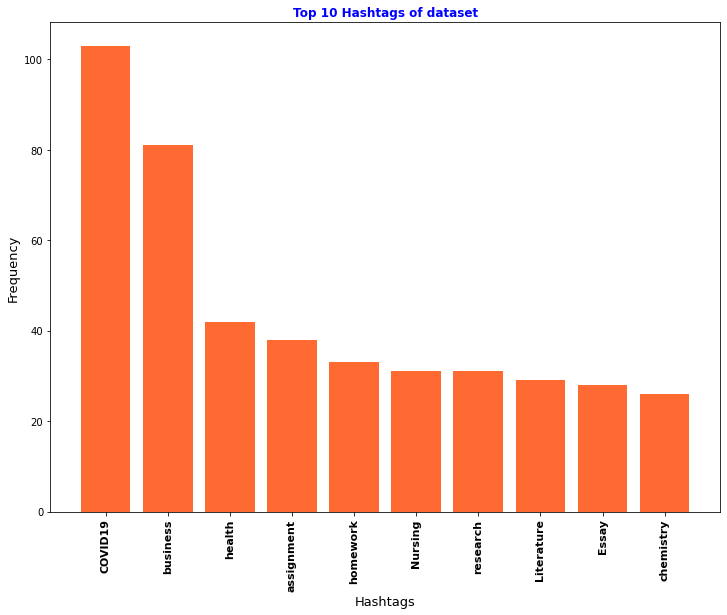

In [9]:
### Visualization of Top 10 Hashtags
labels = tweets_hashtags.head(10).index.values.tolist()
freq = tweets_hashtags['freq'].head(10).values.tolist()
index = np.arange(len(freq))

print("Among 20000 Tweets, 3602 Hashtags were used.")
plt.figure(figsize=(12,9))
plt.bar(index, freq, alpha=0.8, color= 'orangered')
plt.xlabel('Hashtags', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, labels, fontsize=11, rotation=90, fontweight="bold") 
plt.title('Top 10 Hashtags of dataset', fontsize=12, fontweight="bold",color='blue')

In [10]:
tweets = tweets.drop(['hashtags'], axis=1)


 <B> c/extract the username through the tweets (preceded by @ or by RT @), emojis,punctuation</B></p> 

In [11]:
import regex as re


#clean text

def CleanText(TextToClean):
    TextToClean.lower()  #Normalization
    TextToClean = re.sub(r'@[A-Za-z0-9]+', '',str(TextToClean)) #to extract @
    TextToClean= re.sub(r':','',str(TextToClean)) #to remove :
    TextToClean= re.sub(r'\n','',str(TextToClean)) #to remove  \n
    TextToClean= re.sub(r'#','',str(TextToClean)) #to remove #
    TextToClean= re.sub(r'!','',str(TextToClean)) #to remove #
    TextToClean = re.sub(r'RT[\s]','',str(TextToClean)) #to remove #
    TextToClean = re.sub(r'https','',str(TextToClean)) #to remove hyper links
    TextToClean = re.sub(r'_','',str(TextToClean)) #to remove hyper links
    TextToClean = re.sub(r'~~~@…','',str(TextToClean)) #to remove blanc space
    TextToClean =re.sub(r"\&\S*\s", "", str(TextToClean))
    TextToClean = re.sub(r"\&", "", str(TextToClean))
    TextToClean= re.sub(r"\+", "", str(TextToClean))
    TextToClean = re.sub(r"\#", "", str(TextToClean))
    TextToClean = re.sub(r"\$", "", str(TextToClean))
    TextToClean = re.sub(r"\£", "", str(TextToClean))
    TextToClean = re.sub(r"\%", "", str(TextToClean))
    TextToClean= re.sub(r"\:", "", str(TextToClean))
    TextToClean = re.sub(r"\@", "", str(TextToClean))
    TextToClean = re.sub(r"\-", "", str(TextToClean))
    TextToClean = re.sub(r",", "", str(TextToClean))
    TextToClean = re.sub(r" \' ", "", str(TextToClean))
    TextToClean = re.sub(r"\n ", "", str(TextToClean))
    TextToClean = re.sub(r'\s+[a-zA-Z]\s+', "", str(TextToClean))
    TextToClean = re.sub(r" \? ", "", str(TextToClean))
    TextToClean = re.sub(r'[^\w\s]','',str(TextToClean))
    
#     TextToClean = re.sub(r'\s+', "", str(TextToClean))#Removing Extra Whitespaces
#     TextToClean = re.sub(r'\s+[a-zA-Z]\s+', "", str(TextToClean))#Removing single carecter


    return TextToClean




def remove_emoji(Text_with_emoji):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (appel phone)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', Text_with_emoji)




tweets['text'] = tweets['text'].apply(CleanText)
tweets['text'] = tweets['text'].apply(remove_emoji)
# tweets['extended_tweet'] = tweets['text'].apply(CleanText)
# tweets['extended_tweet'] = tweets['text'].apply(remove_emoji)
#lower text
tweets["text"] = tweets["text"].str.lower()
# tweets["extended_tweet"] = tweets["text"].str.lower()




tweets

,text
0,great another going out of business sale
1,health and education services is what he wan...
2,china is well entrenched throughout business...
3,video demba ba sees red as he stands up for hi...
4,fuck your restrictions
...,...
20416,we haveright to education and good health we w...
20417,take action and oppose rushed approvals withou...
20418,revive your aging skin and reduce the appearan...
20419,busy when you ownbusiness this is really the ...


In [12]:
tweets['text'][5]

' new scathing analysis of s shady business by the  thereslot of questions around this guy the'

<div class="alert alert-block alert-success">
<b></b> <B> Now ! we have only cleaned and lower text </B>  

</div>


<h3 style="color:blue;"> <B>  Natural Language Processing </B>  </h3>

<B>Natural language processing includes many different techniques for interpreting human language, ranging from statistical and machine learning methods to rules-based and algorithmic approaches.</B>
</br>
<B>Basic NLP tasks include tokenization and parsing, lemmatization/stemming, part-of-speech tagging, language detection and identification of semantic relationships.</B></br>
<B>In general terms, NLP tasks break down language into shorter, elemental pieces, try to understand relationships between the pieces and explore how the pieces work together to create meaning.</B>


<h4 style="color:orangered;"> <B> Natural Language Toolkit (NLTK) for  analyzing text </B>  </h4>

<B>NLTK is a suite of libraries and programs for symbolic and statistical natural language processing (NLP) for English written in the Python programming language</B>

><h4 style="color:green;"><B> Install NLTK </B></h4>

In [1]:
!pip install nltk

  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434679 sha256=3bc961ddc00caade782f8044f76ddea6f35277e2fc0e79d914c76b880c08c97e
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\ff\d5\7b\f1fb4e1e1603b2f01c2424dd60fbcc50c12ef918bafc44b155
Successfully built nltk


><h4 style="color:green;"><B> Install Conda package for NLTK </B></h4>


<img src ="images/anacondaNLTK.PNG" >

><h4 style="color:green;"><B>Install punkt</B></h4>



<img src="images/punketinstalled.PNG" >


><h4 style="color:orangered;"><B> remove stopwords </B></h4>



<B>In every language, some words are particularly common. While their use in the language is crucial, they don’t usually convey a particular meaning, especially if taken out of context. This is the case of articles, conjunctions, some adverbs, etc. which are commonly called stop-words.</br>
Stop-word removal is one important step that should be considered during the pre-processing stages. </br>
NLTK provides a simple list for English stop-words. </B>

<img src="images/stopwords.PNG" >

><h4 style="color:green;"><B> Tokenization </B></h4>


<B>In this step , we will split tweets text into token (words) by using NLTK’s TweetTokenizer.It can  “collapse” repeated characters - that is, lolll, lollllll, and lollllllllllll will all collapse to the same representation "lolll" (three “l”s). This is helpful because we tend to think that these tokens represent approximately the same thing. This feature helps curb the curse of dimensionality (i.e. too many low-frequency tokens), while maintaining Twitter-specific features.  </B>



In [13]:
#*************************************************************************************************
                                               #This is the stopwords
#*************************************************************************************************

import nltk
#nltk.download()
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

additional  = ['rt','rts','retweet']
swords = set().union(stopwords.words('english'),additional)
print(swords)

tweets['text'] = tweets['text'].apply(lambda x: ' '.join([i for i in x.split() if  i not in (swords)]))

{'theirs', 'has', 'not', 'what', "mightn't", 'can', 'don', "aren't", "haven't", "mustn't", 'weren', 'had', 'before', 'nor', 'all', 'couldn', 'both', 'when', 'shouldn', 'those', "it's", 'am', 'at', 'ain', 'if', 'been', 'aren', 'out', 'only', 'rts', 'above', 'shan', 'herself', 'any', 'which', 'or', 'until', 'hers', 'and', 've', "hadn't", 'does', "wouldn't", 'was', 'over', "hasn't", 'again', 'do', 'himself', 'under', 'ma', 'is', 'most', 'off', 'but', 's', 'ourselves', 'll', 'with', "you're", 'haven', 'such', 'down', "won't", "needn't", 'hadn', 'it', 'each', 'the', 'up', "weren't", 'didn', 'i', 'yourself', "shouldn't", 'mightn', 'their', 'whom', 'for', 'by', 'be', 'because', 'his', 'so', 'then', 'yourselves', 'where', 'him', 'he', 'during', "should've", 'did', 'our', 'hasn', 'doing', 'here', 'few', 'too', "she's", 'rt', 'needn', 'are', 'as', 'to', 'itself', 'you', 'into', "you'd", 'mustn', 'doesn', 'myself', 'yours', 'a', 'how', "doesn't", "wasn't", 'more', 'your', 'o', 'who', 'an', 'won',

In [14]:
tweets['text'][5]

'new scathing analysis shady business thereslot questions around guy'

In [15]:
#*************************************************************************************************
                                               #This is the tokenizer
#*************************************************************************************************


import nltk
# nltk.download()
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
tweets['tokonized_text'] = '' 

tokenizer = TweetTokenizer()
tweets['tokonized_text']  =tweets['text'].apply(tokenizer.tokenize)



In [16]:
tweets['tokonized_text'][5]

['new',
 'scathing',
 'analysis',
 'shady',
 'business',
 'thereslot',
 'questions',
 'around',
 'guy']

><h4 style="color:green;"><B> Stemming </B></h4>


<B>Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.</B>

In [18]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
tweets['stemmed'] = tweets['tokonized_text'].apply(lambda x: [ps.stem(i) for i in x if i != ''])


In [19]:
tweets['stemmed'][5]

['new',
 'scath',
 'analysi',
 'shadi',
 'busi',
 'thereslot',
 'question',
 'around',
 'guy']

><h4 style="color:green;"><B> Lemmatization  </B></h4>


In [20]:
from nltk.stem.wordnet import WordNetLemmatizer
# nltk.download('wordnet') #download wordnet package with code 
lmtzr = WordNetLemmatizer()
tweets['lemma'] = tweets['stemmed'].apply(lambda x: [lmtzr.lemmatize(word,'v') for word in x if word!= ''])


In [21]:
tweets['lemma'][5]

['new',
 'scath',
 'analysi',
 'shadi',
 'busi',
 'thereslot',
 'question',
 'around',
 'guy']

<h3 style="color:blue;"> <B> STEP4 : Modeling </B>  </h3>


><h4 style="color:green;"><B> K-means </B></h4>


<B>Now as a Ml Algorithm for clustering we will use K-means with cosine as a distance metric </B>

<B>By this example we will understand How does K-means work </B>

<img src="images/k-means.png">
<h5 style="color:tomato;"><B> Step1</B></h5>
Here we are having a few data points, which we want to cluster. So we would start by picking the number of clusters we want to have.</br>

<h5 style="color:tomato;"><B> Step2</B></h5>
We have successfully marked the centers of these clusters. Now we will be marking all the points with respective colors on the basis of the distance they have from the centroid.</br>

<h5 style="color:tomato;"><B> Step3</B></h5>
After marking all the data points, we will now be computing the centroid of this cluster again. We are doing it because initially, we had picked the centroid randomly. Then to remove error, if any, we are doing it.

The centroid of the cluster is computed by finding a point within the cluster that would be equidistant from all the data points.</br>

<h5 style="color:tomato;"><B> Step4</B></h5>

Now since we have computed the centroid again and we know it is not the same as it was before so we would iterate the process again and would find the points nearest to this centroid for each cluster.</br>

<h5 style="color:tomato;"><B> Step5</B></h5>
Now we have got the result again. One may ask when shall we stop the iteration of this finding the centroid and then placing the data points accordingly? Well, you have to do it till the time when the position of the centroids doesn’t change.</br>

<h5 style="color:tomato;"><B> Step6</B></h5>
We marked the two clusters.

In this case, it was easy, so we were able to get the results in 2 iterations only.

We had also talked about the random initialization that we are putting ourselves into. With this a problem we have is that it can land us up with some really bad clusters which won’t be of any use. 

><h4 style="color:green;"><B> K-means Mertrics</B></h4>


<B> K-means have 3 distance metrics </B>
    <li><B>Euclidean Distance</B></li>
    <li><B>Cosine Distance</B></li>
    <li><B>Jaccard Similarity</B></li>

<img src="images/metricc.gif">

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from nltk.cluster.kmeans import KMeansClusterer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from collections import Counter
import matplotlib.pyplot as plt
from datetime import datetime
import nltk
import pandas as pd
import numpy as np
import random
from sklearn.decomposition import PCA      

><h4 style="color:green;"><B> Vectorization</B></h4>


<B>TFIDF is another way to convert textual data to numeric form, and is short for Term Frequency-Inverse Document Frequency. The vector value it yields is the product of these two terms; TF and IDF.
Let’s first look at Term Frequency. We have already looked at term frequency with count vectorizer, but this time, we need one more step to calculate the relative frequency. Let’s say we have two documents in our corpus as below.</B>

In [23]:
RUNTIME_MODE = "Cosine"
SAMPLE_COUNT = 14000
MAX_CLUSTER = 25
random.seed(1)

content = tweets['text'].values # Get the news content to news array

stop_words = set(text.ENGLISH_STOP_WORDS)
my_stop_words = text.ENGLISH_STOP_WORDS.union([
 "also", "said", "mr", "mrs", "im", "would", "could", "should", "first", "like", "dont",
 "wont", "get", "going", "ms", "one", "____", "_____", "new", "news", "told", "way",
 "year", "years", "don", "day", "man", "did", "just", "time", "times", "make", "000",
 "united", "state", "states", "people", "ve", "white", "house", "president",
 "government", "york", "want", "know", "think", "officials", "say", "breitbart",
 "percent", "home", "city", "case", "really", "work", "according", "including",
 "good", "campaign", "country", "long", "world", "donald", "trump", "didn", "women",
 "called", "american", "men", "later", "follow", "week", "black", "little", "company",
 "companies", "posted", "morning", "today", "evening", "com", "nytimes", "weekend", "10","business"
]
)
vectorizer = CountVectorizer(stop_words=my_stop_words, binary=False)
X_orig = vectorizer.fit_transform(content[0:SAMPLE_COUNT]).toarray()
svd = TruncatedSVD(n_components=50, random_state = 0)
X = svd.fit_transform(X_orig)
print("orig shape:", X_orig.shape)
print("new shape:", X.shape)

orig shape: (13937, 33694)
new shape: (13937, 50)


><h4 style="color:green;"><B> K-means Clustering</B></h4>


In [ ]:
terms = vectorizer.get_feature_names() # Get the array of terms that exists in documents
inner_dist = np.zeros(shape=[MAX_CLUSTER - 1])
for NUM_CLUSTERS in range(2, MAX_CLUSTER + 1):
    kmeans = KMeansClusterer(num_means=NUM_CLUSTERS,
    distance=nltk.cluster.util.cosine_distance, repeats=25, avoid_empty_clusters=True)
#initial_means=means)
    labels = kmeans.cluster(X, assign_clusters=True)
    cluster_centers = np.asarray(kmeans.means())
    print("Item count in clusters:")
    print(Counter(labels))
    cluster_means = np.zeros(shape=[NUM_CLUSTERS, len(terms)])
    item_counts = np.zeros(shape=[NUM_CLUSTERS])

C:\Users\User\anaconda3\lib\site-packages\nltk\cluster\util.py:131: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (numpy.dot(u, v) / (sqrt(numpy.dot(u, u)) * sqrt(numpy.dot(v, v))))


Item count in clusters:
Counter({1: 7707, 0: 6230})
Item count in clusters:
Counter({1: 7473, 0: 3365, 2: 3099})


In [24]:
terms = vectorizer.get_feature_names() # Get the array of terms that exists in documents
NUM_CLUSTERS = 2
inner_dist = np.zeros(shape=[MAX_CLUSTER - 1])
kmeans = KMeansClusterer(num_means=NUM_CLUSTERS,distance=nltk.cluster.util.cosine_distance, repeats=25, avoid_empty_clusters=True)
#initial_means=means)
labels = kmeans.cluster(X, assign_clusters=True)
cluster_centers = np.asarray(kmeans.means())
print("Item count in clusters:")
print(Counter(labels))
cluster_means = np.zeros(shape=[NUM_CLUSTERS, len(terms)])
item_counts = np.zeros(shape=[NUM_CLUSTERS])

C:\Users\User\anaconda3\lib\site-packages\nltk\cluster\util.py:131: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (numpy.dot(u, v) / (sqrt(numpy.dot(u, u)) * sqrt(numpy.dot(v, v))))


Item count in clusters:
Counter({0: 10802, 1: 3135})


In [35]:
terms = vectorizer.get_feature_names() # Get the array of terms that exists in documents
NUM_CLUSTERS = 4
inner_dist = np.zeros(shape=[MAX_CLUSTER - 1])
kmeans = KMeansClusterer(num_means=NUM_CLUSTERS,distance=nltk.cluster.util.cosine_distance, repeats=25, avoid_empty_clusters=True)
#initial_means=means)
labels = kmeans.cluster(X, assign_clusters=True)
cluster_centers = np.asarray(kmeans.means())
print("Item count in clusters:")
print(Counter(labels))
cluster_means = np.zeros(shape=[NUM_CLUSTERS, len(terms)])
item_counts = np.zeros(shape=[NUM_CLUSTERS])

C:\Users\User\anaconda3\lib\site-packages\nltk\cluster\util.py:131: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (numpy.dot(u, v) / (sqrt(numpy.dot(u, u)) * sqrt(numpy.dot(v, v))))


Item count in clusters:
Counter({0: 7658, 3: 3000, 1: 2189, 2: 1090})


In [ ]:
terms = vectorizer.get_feature_names() # Get the array of terms that exists in documents
NUM_CLUSTERS = 6
inner_dist = np.zeros(shape=[MAX_CLUSTER - 1])
kmeans = KMeansClusterer(num_means=NUM_CLUSTERS,distance=nltk.cluster.util.cosine_distance, repeats=25, avoid_empty_clusters=True)
#initial_means=means)
labels = kmeans.cluster(X, assign_clusters=True)
cluster_centers = np.asarray(kmeans.means())
print("Item count in clusters:")
print(Counter(labels))
cluster_means = np.zeros(shape=[NUM_CLUSTERS, len(terms)])
item_counts = np.zeros(shape=[NUM_CLUSTERS])

In [ ]:
terms = vectorizer.get_feature_names() # Get the array of terms that exists in documents
NUM_CLUSTERS = 10
inner_dist = np.zeros(shape=[MAX_CLUSTER - 1])
kmeans = KMeansClusterer(num_means=NUM_CLUSTERS,distance=nltk.cluster.util.cosine_distance, repeats=25, avoid_empty_clusters=True)
#initial_means=means)
labels = kmeans.cluster(X, assign_clusters=True)
cluster_centers = np.asarray(kmeans.means())
print("Item count in clusters:")
print(Counter(labels))
cluster_means = np.zeros(shape=[NUM_CLUSTERS, len(terms)])
item_counts = np.zeros(shape=[NUM_CLUSTERS])

><h4 style="color:green;"><B> Top words per Cluster</B></h4>


In [25]:
SAMPLE_COUNT = 13500
NUM_CLUSTERS = 2 

for ind in range(SAMPLE_COUNT):
    cluster_means[labels[ind]] = cluster_means[labels[ind]] + X_orig[ind]
    item_counts[labels[ind]] = item_counts[labels[ind]] + 1
for ind in range(NUM_CLUSTERS):
    cluster_means[ind] = cluster_means[ind] / item_counts[ind]
print("Top terms per cluster:")
order_centroids = cluster_means.argsort()[:, ::-1]

for cls in range(NUM_CLUSTERS):
    print("Cluster", cls, ': ', end=''),
    for ind in order_centroids[cls, :6]:
        print(terms[ind], ' , ', end='')
        print()


Top terms per cluster:
Cluster 0 : sport  , 
small  , 
covid19  , 
need  , 
mind  , 
help  , 
Cluster 1 : health  , 
mental  , 
care  , 
public  , 
covid19  , 
team  , 


In [36]:
SAMPLE_COUNT = 13500
NUM_CLUSTERS = 4

for ind in range(SAMPLE_COUNT):
    cluster_means[labels[ind]] = cluster_means[labels[ind]] + X_orig[ind]
    item_counts[labels[ind]] = item_counts[labels[ind]] + 1
for ind in range(NUM_CLUSTERS):
    cluster_means[ind] = cluster_means[ind] / item_counts[ind]
print("Top terms per cluster:")
order_centroids = cluster_means.argsort()[:, ::-1]

for cls in range(NUM_CLUSTERS):
    print("Cluster", cls, ': ', end=''),
    for ind in order_centroids[cls, :1]:
        print(terms[ind], ' , ', end='')
        print()


Top terms per cluster:
Cluster 0 : covid19  , 
Cluster 1 : small  , 
Cluster 2 : sport  , 
Cluster 3 : health  , 



><h4 style="color:green;"><B> PCA</B></h4>

In [28]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(13937, 2)

><h4 style="color:green;"><B>Display Clusters  
</B></h4>

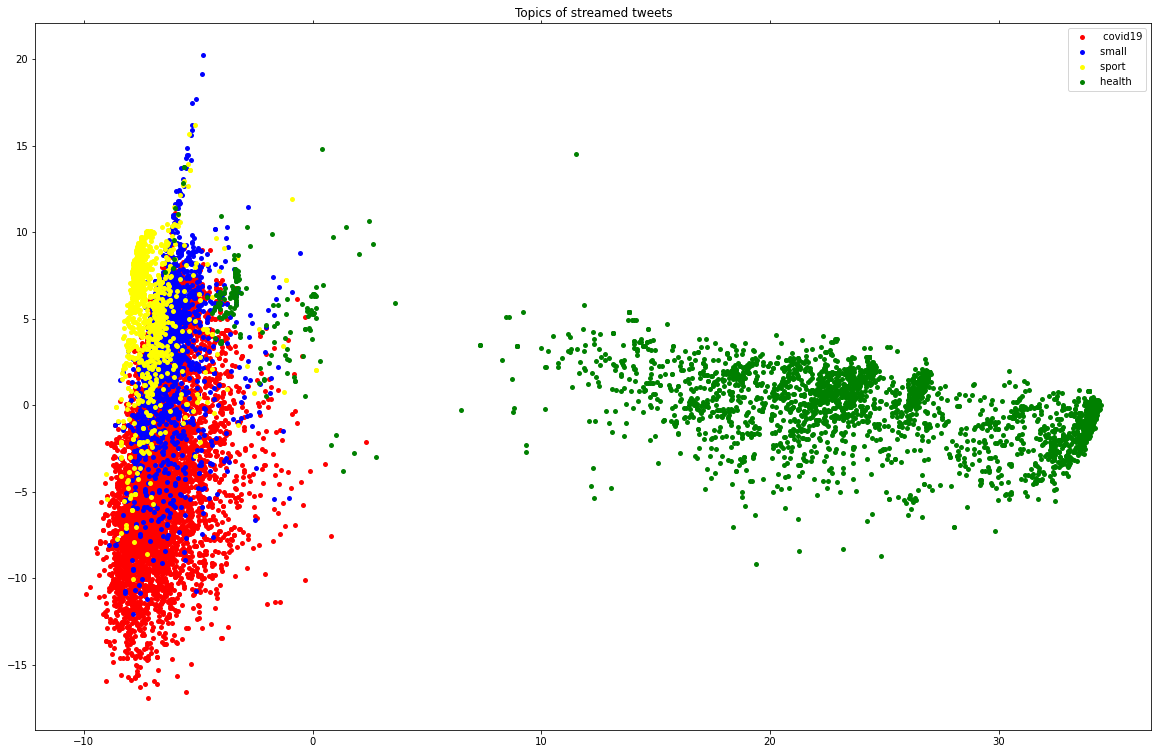

In [37]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'yellow',
          3:'green'
         }

names = { 
           0 :' covid19'  , 
           1 : 'small ' , 
            2 : 'sport ' , 
            3 : 'health ' 
         }
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Topics of streamed tweets")
plt.show()

><h4 style="color:green;"><B>Démo
</B></h4>

<img src="images/démo.gif">

<h3 style="color:blue;"> <B>Conclusion</B>
 </B> </h3>

<B>In the present project ,K-Means algorithm has been executed by</B>

<li><B>data representation method :TF-IDF</B></li>
<li><B>Distance metrics : Cosine Similarity</B></li>
<li><B>k =6 values (2 to 6 clusters)</B></li>

<B> References </B>

https://www.datacamp.com/community/tutorials/stemming-lemmatization-python</br>
https://datascienceplus.com/twitter-analysis-with-python/</br>
https://berkeley-stat159-f17.github.io/stat159-f17/lectures/11-strings/11-nltk..html</br>
https://www.xspdf.com/resolution/52940753.html</br>
https://medium.com/analytics-vidhya/exploring-twitter-data-using-python-af1287ee65f1</br>
https://towardsdatascience.com/kmeans-clustering-for-classification-74b992405d0a
https://www.xspdf.com/resolution/55501459.html

<B>For requirements.txt</B>

In [2]:
pip install watermark


Note: you may need to restart the kernel to use updated packages.


In [40]:
%load_ext watermark


In [10]:
%watermark?



Docstring:
::

  %watermark [-a AUTHOR] [-d] [-n] [-t] [-i] [-z] [-u] [-c CUSTOM_TIME] [-v] [-p PACKAGES] [-h] [-m] [-g] [-r]
                 [-b] [-w] [-iv]

IPython magic function to print date/time stamps
and various system information.

optional arguments:
  -a AUTHOR, --author AUTHOR
                        prints author name
  -d, --date            prints current date as YYYY-mm-dd
  -n, --datename        prints date with abbrv. day and month names
  -t, --time            prints current time as HH-MM-SS
  -i, --iso8601         prints the combined date and time including the time zone in the ISO 8601 standard with UTC
                        offset
  -z, --timezone        appends the local time zone
  -u, --updated         appends a string "Last updated: "
  -c CUSTOM_TIME, --custom_time CUSTOM_TIME
                        prints a valid strftime() string
  -v, --python          prints Python and IPython version
  -p PACKAGES, --packages PACKAGES
                        prints ve

In [41]:
%watermark --iversions

numpy     : 1.18.5
matplotlib: 3.2.2
pandas    : 1.0.5
regex     : 2020.6.8
nltk      : 3.5
sklearn   : 0.22
seaborn   : 0.10.1
tweepy    : 3.9.0

